<a href="https://colab.research.google.com/github/skdarkey/Selorm_Portfolio/blob/main/Clothings_Image_Recognition_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Image classification project
* By: `Selorm Komla Darkey` (skdarkey@gmail.com)


* **Objective**:
* Using Deep Learning approach, I built neural network models in attempt to classify images of different items of clothings.
  * No. of unique classes to classify 10
  * Training data : 60,000 images
  * Testing data : 10,000 images
  * Image Size: 28x28 grayscale images.
  * Dataset Source: Tensorflow Fashion MNIST dataset.

* Brief Summary: I built 3 different neural network models and compared their accuracy on the testing data. The best performing model achieved an accurary of 80%. Through the confusion matrix computed, it was observed that images of few classes such as T-shirt and Pullover were the most misclassified since their images tend to look quite familiar.

* The best performing model's pareters, weights and biases were saved and could be used in external application.

Let's check out how the data looks in real life:
![](https://drive.google.com/uc?export=view&id=1qzYzZ2JzCmY_o00cFIUtu-EDZWcQlAth) ![](https://drive.google.com/uc?export=view&id=13ENgvkPkNiR8lnnXjkwkuGSMvchot1De)
Each of the images in the dataset corresponds to one of these labels  
![picture](https://drive.google.com/uc?export=view&id=1e4zJvfL3cps_reHyorww-M6II8K8MBru)





In [ ]:
# importing the libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt


In [ ]:
# Downloading the dataset
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# checking the first training examples
print(f"Training samples:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training samples:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
# checking the shape of the data
train_data.shape, train_labels.shape  # 60,000 elements of 28x28 pixel size each

((60000, 28, 28), (60000,))

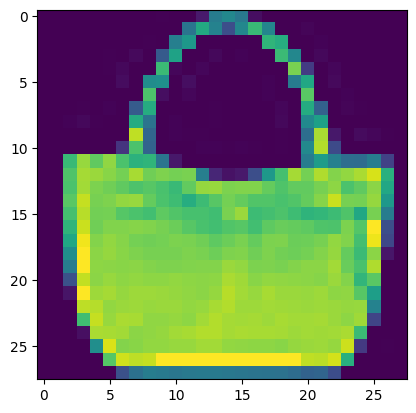

In [ ]:
# visualizing single training variables
plt.imshow(train_data[100])

In [ ]:
# What label is given to this image above?
train_labels[100]          # class no. 8 is labelled as a bag

8

In [ ]:
# let me create a small list to show the labels asigned to images instead of the numbers we are getting
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandals", "Shirt", "Sneaker", "Bag", "Ankle boot"]


Text(0.5, 1.0, 'Bag')

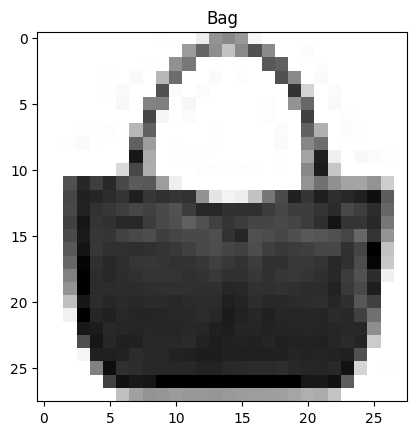

In [ ]:
# Plot example image with its label
index_of_choice = 100
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])


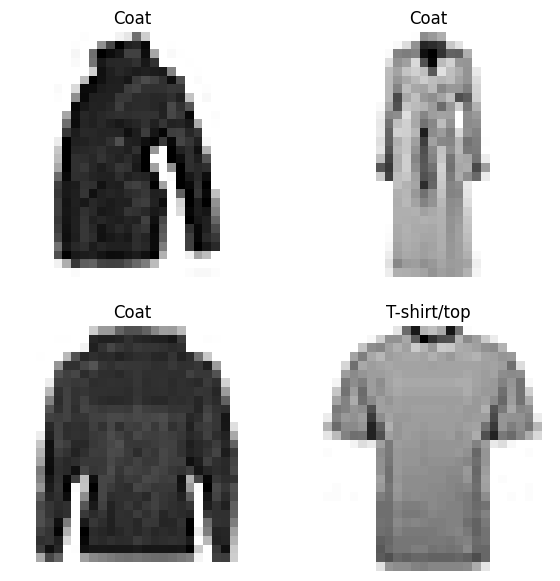

In [ ]:
# Plot multiple random images to inspect the dataset
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))   # picking a random number from the train_data
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a model to classify the data
* With the dataset at hand, my model will have:
** An input shape of 28x28
** Output shape of 10
** Softmax activation in output layer
** Loss fxn, I will use SparseCategoricalCrossentropy(). Why? Because my labels are integers between higher than zero and ones.


In [ ]:
# Building first model
tf.random.set_seed(42)
# step 1: Build
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),      # instead of direct 784
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
# step 2: compile
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# step 3: fit model
non_norm_history = model_1.fit(tf.expand_dims(train_data, axis=-1),
                               train_labels,
                               epochs=10,
                               validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 2.3342 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2820 - accuracy: 0.1086 - val_loss: 2.1101 - val_accuracy: 0.1779
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8440 - accuracy: 0.2600 - val_loss: 1.6247 - val_accuracy: 0.3276
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5416 - accuracy: 0.3326 - val_loss: 1.4898 - val_accuracy: 0.3596
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4616 - accuracy: 0.3490 - val_loss: 1.4433 - val_accuracy: 0.3619
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4239 - accuracy: 0.3571 - val_loss: 1.4387 - val_accuracy: 0.3449
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4066 - accuracy: 0.3574 - val_loss: 1.4284 - val_accuracy:

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


## Improving performance with normalisation
* Using mean normalisation to transform the data to have their numbers between zeros and ones (0 & 1)

* Currently, image pixel values are ranging from 0 to 255, normalization here is achieved by dividing the training and testing data by the maximum.

In [ ]:
# normalization
train_data_norm = train_data/ 255.0
test_data_norm = test_data / 255.0

# check the min and max values of the scalled data
(train_data_norm.min(), train_data_norm.max()), (test_data_norm.min(), test_data_norm.max())

((0.0, 1.0), (0.0, 1.0))

In [ ]:
# Building the model for the normalized data

tf.random.set_seed(42)
# step 1: Build
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
# step 2: compile
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# step 3: fit model
norm_history = model_2.fit(tf.expand_dims(train_data_norm, axis=-1),
                               train_labels,
                               epochs=10,
                               validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2558 - accuracy: 0.4780 - val_loss: 0.9370 - val_accuracy: 0.6270
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8460 - accuracy: 0.6495 - val_loss: 0.8289 - val_accuracy: 0.6753
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7701 - accuracy: 0.6953 - val_loss: 0.7764 - val_accuracy: 0.7147
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7424 - accuracy: 0.7110 - val_loss: 0.7486 - val_accuracy: 0.7175
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7252 - accuracy: 0.7296 - val_loss: 0.7310 - val_accuracy: 0.7349
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7067 - accuracy: 0.7474 - val_loss: 0.7296 - val_accuracy: 0.7421
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6850 - accuracy: 0.7556 - val_loss: 0.7307 - val_accuracy:

The model trained on Normalized data with same architecture as the one trained on non-normalized data performed much better, reaching an accuracy of 76% compared to 40% of the earlier one

## Comparing the loss curves of both models

<Axes: title={'center': 'Normalized data'}>

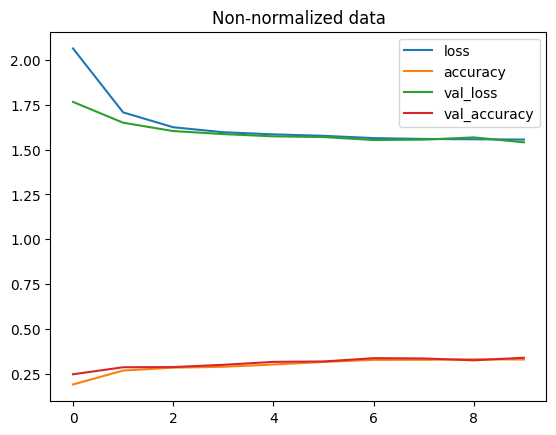

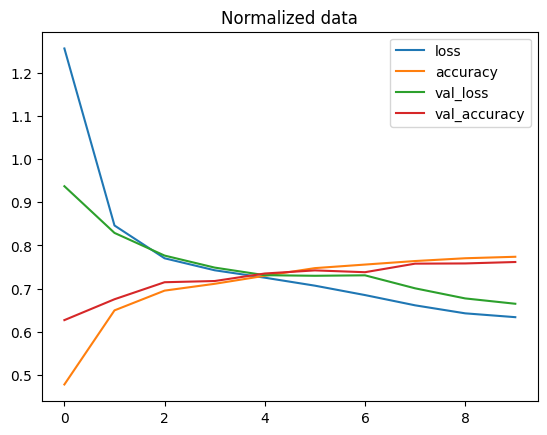

In [ ]:
import pandas as pd
# loss curve for non-normalised data
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# loss curve for normalised data
pd.DataFrame(norm_history.history).plot(title="Normalized data")

**Note**: The same model with even *slightly* different data produced *significantly* different results.

## Finding the ideal learning rate

In [ ]:
# set random seed
tf.random.set_seed(42)
# step 1: build
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="sigmoid")
])
# step 2: compile
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# creating a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# step 3: fit
history_3 = model_3.fit(tf.expand_dims(train_data_norm, axis=-1),
                        train_labels,
                        epochs=40,
                        validation_data=(test_data_norm, test_labels),
                        callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5205 - accuracy: 0.4439 - val_loss: 1.2739 - val_accuracy: 0.5002 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1251 - accuracy: 0.5484 - val_loss: 0.9899 - val_accuracy: 0.5996 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9062 - accuracy: 0.6243 - val_loss: 0.8982 - val_accuracy: 0.6401 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8121 - accuracy: 0.6778 - val_loss: 0.7941 - val_accuracy: 0.6939 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7291 - accuracy: 0.7166 - val_loss: 0.7157 - val_accuracy: 0.7478 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6496 - accuracy: 0.7779 - val_loss: 0.6719 - val_accuracy: 0.7772 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

Text(0.5, 1.0, 'Finding the ideal learning rate')

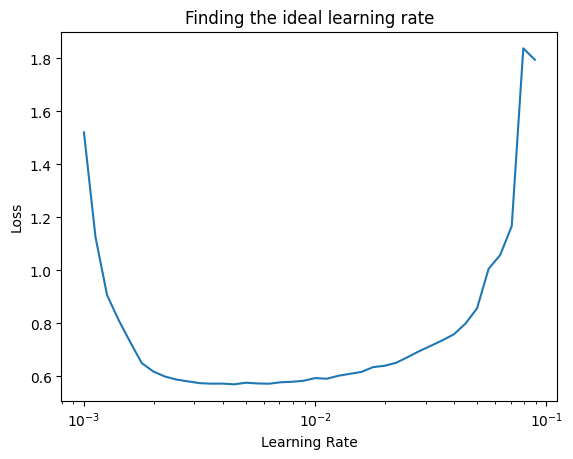

In [ ]:
# Ploting the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, history_3.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
10**-3

0.001

From investigating this curve, I choose as ideal learning rate 0.001

In [ ]:
## Refitting the model for the ideal learning rate

# set random seed
tf.random.set_seed(42)

# step 1: build
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# step 2: compile
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
# step 3: fit
history_4 = model_4.fit(tf.expand_dims(train_data_norm, axis=-1),
                        train_labels,
                        epochs=20,
                        validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1613 - accuracy: 0.6337 - val_loss: 0.8277 - val_accuracy: 0.7458
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7540 - accuracy: 0.7549 - val_loss: 0.7526 - val_accuracy: 0.7533
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6913 - accuracy: 0.7687 - val_loss: 0.7052 - val_accuracy: 0.7644
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6588 - accuracy: 0.7795 - val_loss: 0.6914 - val_accuracy: 0.7752
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6363 - accuracy: 0.7864 - val_loss: 0.6680 - val_accuracy: 0.7776
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6193 - accuracy: 0.7923 - val_loss: 0.6609 - val_accuracy: 0.7804
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6058 - accuracy: 0.7949 - val_loss: 0.6568 - val_accuracy:

## Evaluating the classification model
To evaluate the models performance, I used in here:
* Confusion matrix
* and visualizations



In [ ]:
# Evaluating confusion matrix

# defining my custom function for the confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """
  This function takes in true labels and the predicted labels and create a confusion matrix to visualize correctly
  classsified and misclassified features.
  """

  # create the confussion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[: , np.newaxis]
  n_classes = cm.shape[0]    # getting the number of classes

  # Getting it pretty
  fig, ax = plt.subplots(figsize=figsize)
  # create matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)      # Matshow for displaying an array as a matrix in a new figure window.
  fig.colorbar(cax)

  # Set labels to the classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title = "Confusion Matrix",
        xlabel = "predicted Label",
        ylabel = "True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  # Seting x-ais labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjusting label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # seting the threshold for different colors
  threshold = (cm.max() + cm.min()) /2

  # ploting the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
    horizontalalignment = "center",
    color="white" if cm[i, j] > threshold else "black",
            size = text_size)

In [ ]:
## making prediction with our model
y_probs = model_4.predict(test_data_norm)
y_probs[0]      # prob values for an image belonging to a label

313/313 [==============================] - 0s 1ms/step


array([3.8369006e-09, 3.7208540e-08, 7.8976006e-11, 1.9884896e-09,
       2.6480609e-07, 1.1036415e-01, 4.9568889e-08, 4.2466453e-01,
       3.0280364e-04, 4.6466815e-01], dtype=float32)

In [ ]:
# Convert all prediction probabilities into integers.
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[: 10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

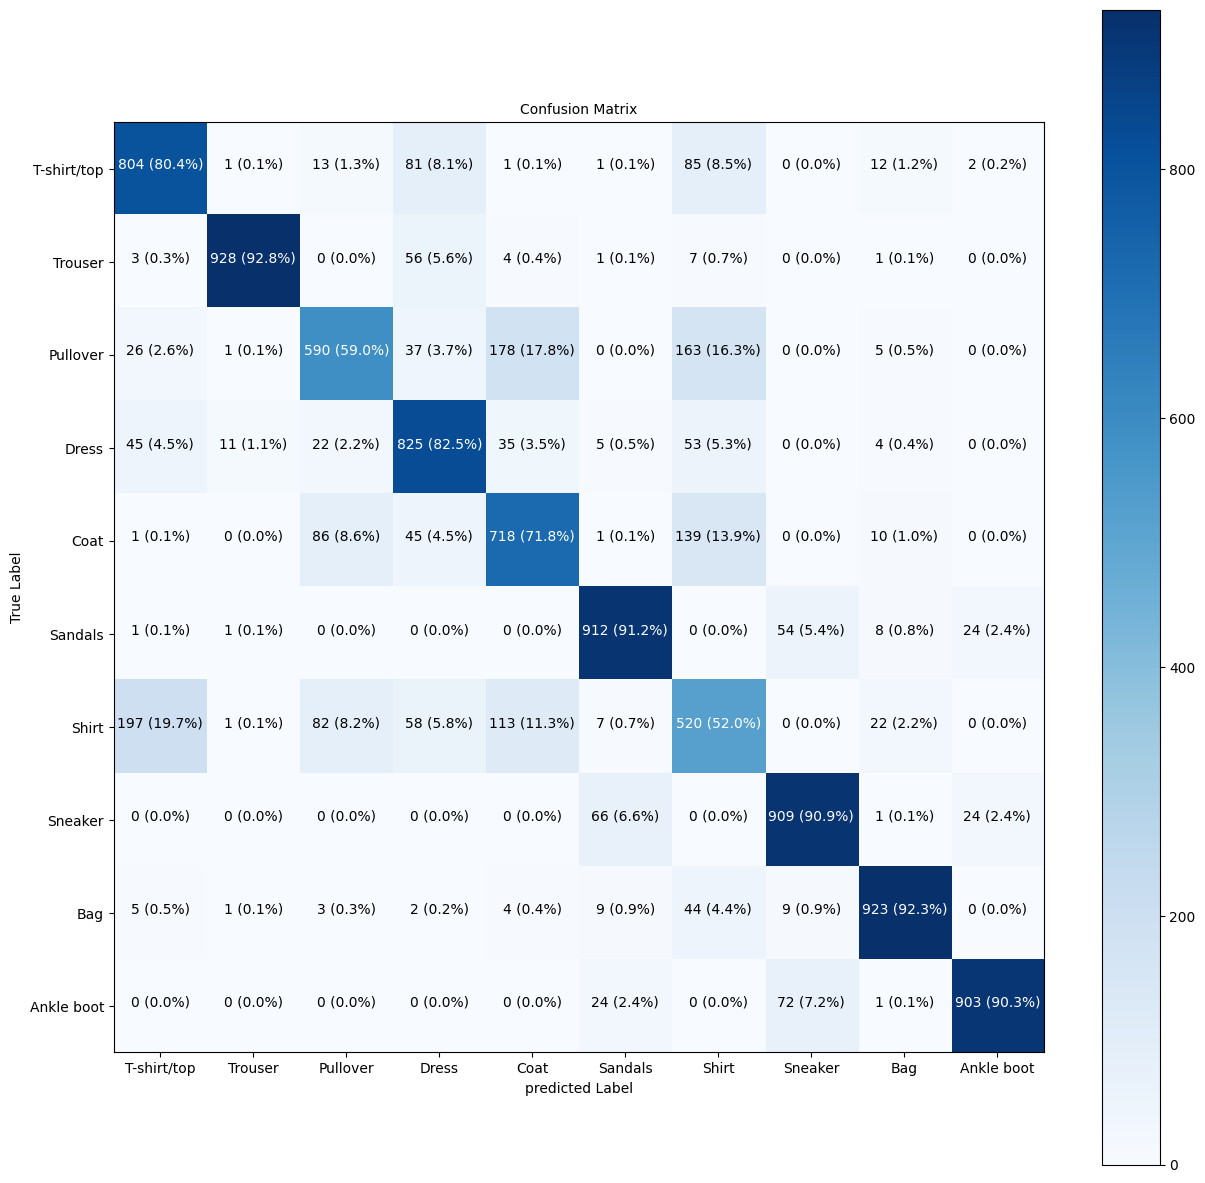

In [ ]:
# plotting the confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

Let me visualize some more the predictions and their accuracies

Here i create a little function to:
  * Plot a random image
  * Make a prediction on said image
  * Label the plot with the truth label & predicted label


In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Seting up random integer
  i = random.randint(0, len(images))

  # Creating prediction and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))  # passing in only one image at a time
  pred_label = classes[pred_probs.argmax()] # getting highest prob values for the image
  true_label = classes[true_labels[i]]

  # ploting the image
  plt.imshow(target_image, cmap=plt.cm.binary)

# changing the color of the titles depending on the prediction being right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

 # Adding xlabel information prediction/true label
  plt.xlabel("Pred:{} {:2.0f}% (True:{})".format(pred_label,
                                                 100*tf.reduce_max(pred_probs),
                                                 true_label),
                                                 color=color) # setting the color to green or red based prediction being right or wrong

1/1 [==============================] - 0s 20ms/step


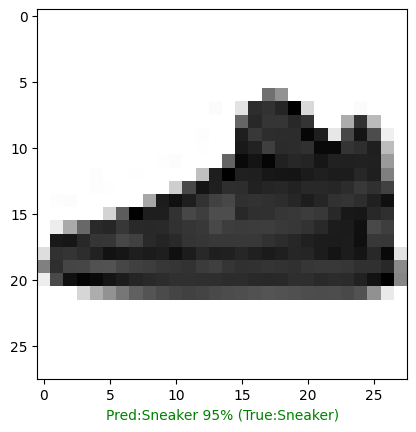

In [ ]:
# check out a random image as well as its prediction
plot_random_image(model=model_4,
                  images=test_data_norm,
                  true_labels = test_labels,
                  classes=class_names)

## Seeing some of the model's internal weights and biases?



In [ ]:
# Finding the layers of the model (no. 4)
model_4.layers

In [ ]:
# checking the model's architecture
model_4.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 4)                 3140      
                                                                 
 dense_37 (Dense)            (None, 4)                 20        
                                                                 
 dense_38 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


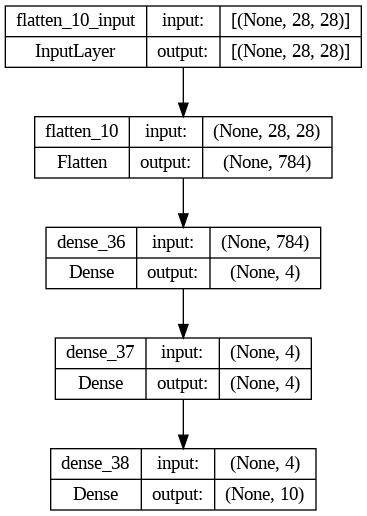

In [ ]:
# Visualising the architecture
from tensorflow.keras.utils import plot_model

plot_model(model_4, show_shapes=True)

In [ ]:
# Extracting a particular layer
model_4.layers[1]

In [ ]:
# Geting the weights of a layer in the network
weights, biases = model_4.layers[1].get_weights()
weights, biases

(array([[ 0.43040603, -0.32322532,  0.3220864 , -0.16828787],
        [-0.16299626, -0.4743132 , -0.08685061,  0.10507356],
        [-0.89834046, -0.6659933 ,  0.7657134 ,  0.3522245 ],
        ...,
        [-0.03106049, -0.6777167 , -0.02616595, -0.19038366],
        [ 0.4187262 , -0.26231676,  0.15501682, -0.15437856],
        [-0.21742603, -0.3381177 ,  0.18647878,  0.2323908 ]],
       dtype=float32),
 array([ 2.3885398, -0.7033957, -1.0829873,  0.0644509], dtype=float32))

In [ ]:
# checking the baises too
biases, biases.shape

(array([ 2.3885398, -0.7033957, -1.0829873,  0.0644509], dtype=float32), (4,))

Nice

In [ ]:
## Saving the model
model_4.save("Model_4_MNIST_Fashion_HDF5_FMT.h5_fmt")